In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn

In [2]:
income = pd.read_csv('income/data/income-clean.csv')
cleaned_df = pd.read_csv('satisfaction/data/satisfaction-data-clean-updated.csv')
sentiment = pd.read_csv('sentiment_score_annual.csv')

In [3]:
cleaned_df.loc[cleaned_df["Indicators"] == "Life satisfaction rating between 0 and 5", 'Rating'] = 2.5
cleaned_df.loc[cleaned_df["Indicators"] == "Life satisfaction rating of 6 or 7", 'Rating'] = 6.5
cleaned_df.loc[cleaned_df["Indicators"] == "Life satisfaction rating of 8, 9 or 10", 'Rating'] = 9

In [4]:
total_df = cleaned_df[(cleaned_df['Gender'] == 'Total, all persons') & (cleaned_df['GEO'] != 'Canada (excluding territories)')]

In [5]:
total_df['score'] = total_df['VALUE'] * total_df['Rating']/100

/var/folders/j4/0qxsb2b12h50ql4d2_4ph_vc0000gn/T/ipykernel_24812/1378795955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['score'] = total_df['VALUE'] * total_df['Rating']/100


In [6]:
total_df = total_df.groupby(['GEO', 'REF_DATE'])['score'].sum().reset_index(name ='Satisfaction Score')

In [7]:
satisfaction_score = total_df.groupby('GEO')['Satisfaction Score'].mean().reset_index(name ='Satisfaction Score')

In [8]:
income = income[income['Statistics'] == 'Median income (excluding zeros)']

In [9]:
income_1 = income.drop(columns=['Age group', 'REF_DATE', 'Sex', 'Income source', 'Statistics', 'Unnamed: 0'])

In [10]:
combined = pd.merge(income_1, satisfaction_score, on='GEO')

In [11]:
line = stats.linregress(combined['Satisfaction Score'], combined['VALUE'])

In [12]:
combined['prediction'] = line.intercept + line.slope*combined['Satisfaction Score']

In [13]:
combined

,GEO,VALUE,Satisfaction Score,prediction
0,Newfoundland and Labrador,39100,7.292500,41456.084312
1,Prince Edward Island,40900,7.322875,41390.196350
2,Nova Scotia,38700,6.931500,42239.147831
3,New Brunswick,40100,7.048000,41986.441737
4,Quebec,43900,7.429875,41158.097191
5,Ontario,42700,6.797250,42530.356356
6,Manitoba,41100,7.059000,41962.581076
7,Saskatchewan,43900,7.077500,41922.451782
8,Alberta,45200,6.912500,42280.361701
9,British Columbia,43900,6.777000,42574.281664


In [14]:
line

LinregressResult(slope=-2169.1510223014316, intercept=57274.61814235515, rvalue=-0.21289407911529148, pvalue=0.5548339870856557, stderr=3519.7291159045753, intercept_stderr=24877.329195654427)

<Figure size 640x480 with 0 Axes>

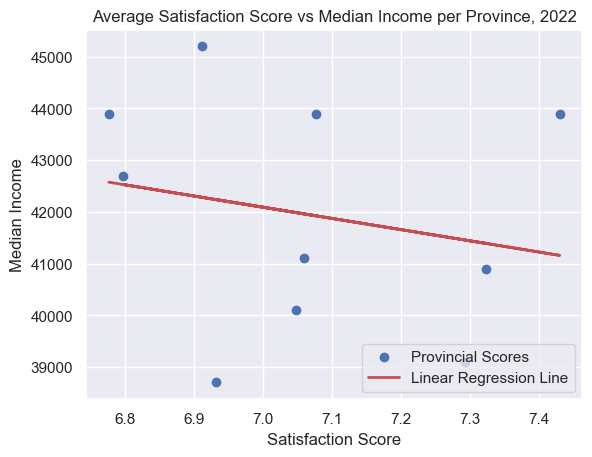

In [15]:
seaborn.set()
plt.figure()
fig, ax = plt.subplots()
ax.scatter(combined['Satisfaction Score'], combined['VALUE'])
ax.set_title('Average Satisfaction Score vs Median Income per Province, 2022')
ax.set_xlabel('Satisfaction Score')
ax.set_ylabel('Median Income')
ax.plot(combined['Satisfaction Score'], combined['prediction'], 'r-', linewidth=2)
ax.legend(['Provincial Scores', 'Linear Regression Line'], loc='lower right')

In [16]:
sentiment

,subreddit,year,score
0,Manitoba,2016,0.455419
1,Manitoba,2017,0.411702
2,Manitoba,2018,0.430210
3,Manitoba,2019,0.491842
4,Manitoba,2020,0.389482
...,...,...,...
91,saskatchewan,2019,0.314265
92,saskatchewan,2020,0.308508
93,saskatchewan,2021,0.289836
94,saskatchewan,2022,0.289691


In [17]:
sentiment_clean = sentiment[sentiment['year'] == 2022]

In [18]:
sentiment_clean = sentiment_clean.rename(columns={"subreddit":'GEO'})

In [19]:
sentiment_clean.loc[sentiment_clean['GEO'] == "NovaScotia", "GEO"] = 'Nova Scotia'
sentiment_clean.loc[sentiment_clean['GEO'] == "PEI", "GEO"] = 'Prince Edward Island'
sentiment_clean.loc[sentiment_clean['GEO'] == "alberta", "GEO"] = 'Alberta'
sentiment_clean.loc[sentiment_clean['GEO'] == "britishcolumbia", "GEO"] = 'British Columbia'
sentiment_clean.loc[sentiment_clean['GEO'] == "newbrunswickcanada", "GEO"] = 'New Brunswick'
sentiment_clean.loc[sentiment_clean['GEO'] == "newfoundland", "GEO"] = 'Newfoundland and Labrador'
sentiment_clean.loc[sentiment_clean['GEO'] == "ontario", "GEO"] = 'Ontario'
sentiment_clean.loc[sentiment_clean['GEO'] == "saskatchewan", "GEO"] = 'Saskatchewan'

In [20]:
sentiment_clean = sentiment_clean[sentiment_clean['GEO'] != 'NWT']
sentiment_clean = sentiment_clean[sentiment_clean['GEO'] != 'Yukon']
sentiment_clean = sentiment_clean[sentiment_clean['GEO'] != 'nunavut']

In [21]:
merged = pd.merge(sentiment_clean, income_1, on='GEO')

In [22]:
merged = merged.rename(columns={"score": "Sentiment Score"})

In [23]:
merged

,GEO,year,Sentiment Score,VALUE
0,Manitoba,2022,0.338818,41100
1,Nova Scotia,2022,0.385423,38700
2,Prince Edward Island,2022,0.364553,40900
3,Alberta,2022,0.306989,45200
4,British Columbia,2022,0.318652,43900
5,New Brunswick,2022,0.328199,40100
6,Newfoundland and Labrador,2022,0.345370,39100
7,Ontario,2022,0.248206,42700
8,Saskatchewan,2022,0.289691,43900


In [24]:
line = stats.linregress(merged['Sentiment Score'], merged['VALUE'])

In [25]:
merged['prediction'] = line.intercept + line.slope*merged['Sentiment Score']

In [26]:
merged

,GEO,year,Sentiment Score,VALUE,prediction
0,Manitoba,2022,0.338818,41100,41208.081111
1,Nova Scotia,2022,0.385423,38700,39423.589135
2,Prince Edward Island,2022,0.364553,40900,40222.702715
3,Alberta,2022,0.306989,45200,42426.793496
4,British Columbia,2022,0.318652,43900,41980.221648
5,New Brunswick,2022,0.328199,40100,41614.662354
6,Newfoundland and Labrador,2022,0.345370,39100,40957.212658
7,Ontario,2022,0.248206,42700,44677.592152
8,Saskatchewan,2022,0.289691,43900,43089.144731


In [28]:
line

LinregressResult(slope=-38289.745768160436, intercept=54181.328309942146, rvalue=-0.6804560723099891, pvalue=0.04366953009297445, stderr=15585.19481913447, intercept_stderr=5102.151490064792)

<Figure size 640x480 with 0 Axes>

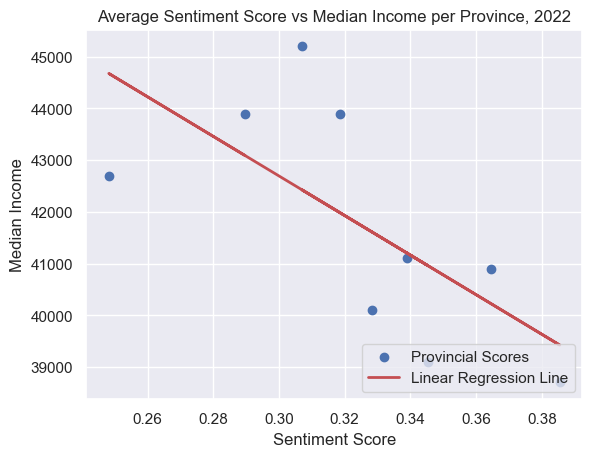

In [29]:
seaborn.set()
plt.figure()
fig, ax = plt.subplots()
ax.scatter(merged['Sentiment Score'], merged['VALUE'])
ax.set_title('Average Sentiment Score vs Median Income per Province, 2022')
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Median Income')
ax.plot(merged['Sentiment Score'], merged['prediction'], 'r-', linewidth=2)
ax.legend(['Provincial Scores', 'Linear Regression Line'], loc='lower right')